In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Dowload Dataset from : https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data

In [2]:
files = [file for file in os.listdir('Sales_Data')]

In [3]:
files

['Sales_August_2019.csv',
 'Sales_February_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv',
 'Sales_May_2019.csv',
 'Sales_March_2019.csv',
 'Sales_December_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_June_2019.csv',
 'Sales_July_2019.csv',
 'Sales_November_2019.csv']

### Merging the all files in one file

In [4]:
sales_data = pd.DataFrame()
for file in files:
    monthly_data = pd.read_csv('Sales_Data/'+file)
    sales_data = pd.concat([sales_data , monthly_data])
sales_data.to_csv('sales_data.csv', index=False)

In [5]:
df = pd.read_csv('sales_data.csv')
df.shape

(186850, 6)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Preprocessing

In [8]:
df[df['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185960,NaN,NaN,NaN,NaN,NaN,NaN
186136,NaN,NaN,NaN,NaN,NaN,NaN
186416,NaN,NaN,NaN,NaN,NaN,NaN
186653,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [11]:
extra = df[df['Order ID'].str.contains('Order ID')].index
df.drop(extra , inplace=True)

In [12]:
#chnaging data types of columns
df[['Order ID', 'Quantity Ordered', 'Price Each']] = df[['Order ID', 'Quantity Ordered', 
                                                        'Price Each']].apply(pd.to_numeric)


In [13]:
df.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [14]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
628,237276,Lightning Charging Cable,1,14.95,08/22/19 10:43,"446 2nd St, Boston, MA 02215"
925,237560,USB-C Charging Cable,1,11.95,08/09/19 00:26,"397 Lincoln St, San Francisco, CA 94016"
2260,238842,Wired Headphones,1,11.99,08/28/19 17:59,"320 Park St, San Francisco, CA 94016"
4173,240682,27in FHD Monitor,1,149.99,08/12/19 10:51,"869 Jefferson St, Austin, TX 73301"
4701,241182,27in 4K Gaming Monitor,1,389.99,08/31/19 20:22,"580 6th St, New York City, NY 10001"
...,...,...,...,...,...,...
182956,291949,Lightning Charging Cable,1,14.95,11/30/19 23:22,"114 Elm St, Atlanta, GA 30301"
183356,292335,AA Batteries (4-pack),1,3.84,11/09/19 11:23,"834 5th St, Dallas, TX 75001"
184169,293114,USB-C Charging Cable,1,11.95,11/29/19 14:35,"145 8th St, Austin, TX 73301"
184317,293254,Apple Airpods Headphones,1,150.00,11/01/19 12:07,"762 12th St, San Francisco, CA 94016"


In [15]:
df= df.drop_duplicates(keep ='first')

In [16]:
df.shape

(185686, 6)

### Adding Month Column to dataframe

In [17]:
df['Month'] = df['Order Date'].str[0:2]

In [18]:
df['Month'] = df['Month'].astype('int')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8
...,...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11
186846,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11
186847,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11
186848,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11


In [19]:
# df['Month'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 11.3+ MB


In [20]:
df['Total Price'] = df['Quantity Ordered']* df['Price Each']

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


### which month has the highest sales

In [22]:
sal=df.groupby('Month')['Total Price'].sum()
print(sal)

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Total Price, dtype: float64


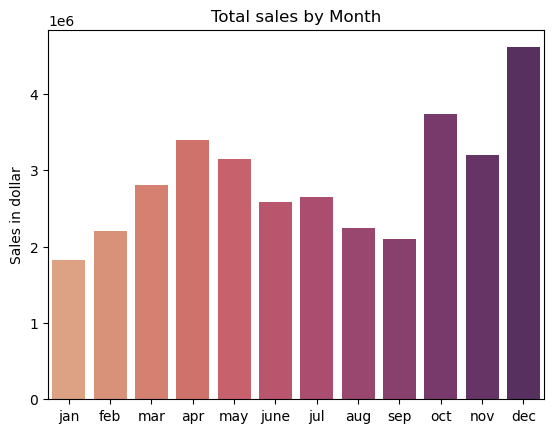

In [23]:
month = range(1,13)
m= ['jan','feb','mar','apr','may','june','jul','aug','sep', 'oct', 'nov', 'dec']
sns.barplot(x=m, y=sal, palette='flare')
plt.title('Total sales by Month')
plt.ylabel('Sales in dollar')
plt.show()

### Which City had the highest number of sales

In [24]:
df['City'] = (df['Purchase Address'].str.split(',').str[1]) + ' ' + (df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1])

In [25]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City NY
...,...,...,...,...,...,...,...,...,...
186845,295660,AAA Batteries (4-pack),2,2.99,11/04/19 14:17,"574 4th St, Los Angeles, CA 90001",11,5.98,Los Angeles CA
186846,295661,USB-C Charging Cable,1,11.95,11/23/19 07:22,"359 1st St, Austin, TX 73301",11,11.95,Austin TX
186847,295662,Lightning Charging Cable,1,14.95,11/13/19 16:12,"900 10th St, Boston, MA 02215",11,14.95,Boston MA
186848,295663,AAA Batteries (4-pack),1,2.99,11/17/19 17:08,"592 Sunset St, Boston, MA 02215",11,2.99,Boston MA


In [26]:
c =df.groupby('City')['Total Price'].sum()
print(c)

City
 Atlanta GA          2794199.07
 Austin TX           1818044.33
 Boston MA           3658627.65
 Dallas TX           2765373.96
 Los Angeles CA      5448304.28
 New York City NY    4661867.14
 Portland ME          449321.38
 Portland OR         1870010.56
 San Francisco CA    8254743.55
 Seattle WA          2745046.02
Name: Total Price, dtype: float64


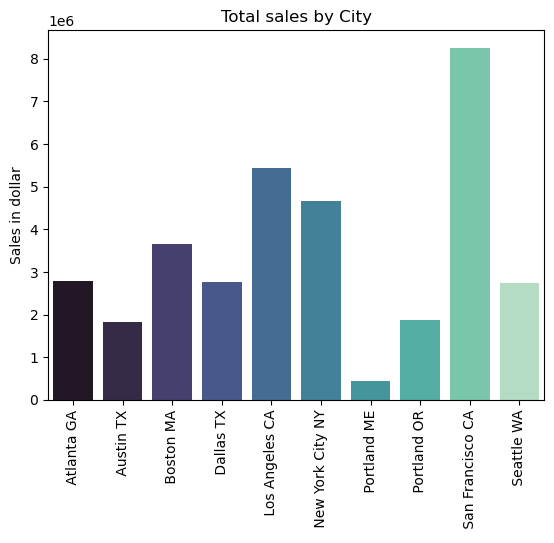

In [27]:
city = [city for city, i in df.groupby('City')]
sns.barplot(x=city, y= c, palette='mako')
plt.title('Total sales by City')
plt.ylabel('Sales in dollar')
plt.xticks(rotation =90)
plt.show()

### Which Product has the hieghst no. of sales by money

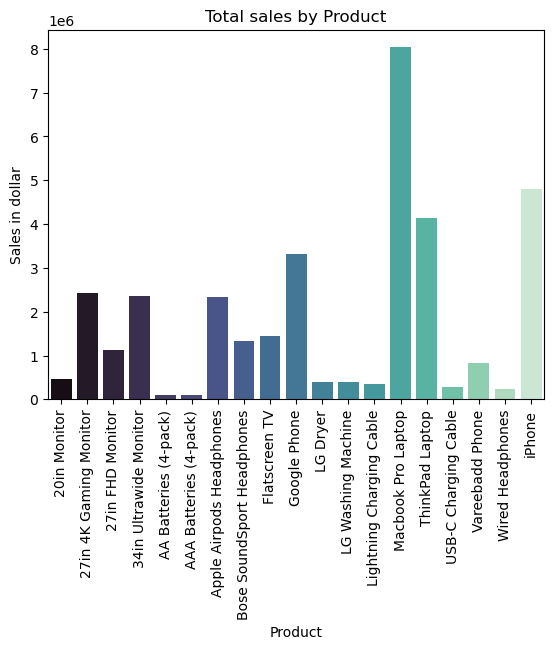

In [86]:
prod = [prod for prod, i in df.groupby('Product')]
m_price = df.groupby('Product')['Total Price'].sum()

sns.barplot(x=prod, y= m_price, palette='mako')
plt.title('Total sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales in dollar')
plt.xticks(rotation =90)
plt.show()

### Which time of the day has most sales? which part of the day we can advertise more

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour']= df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle WA,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas TX,15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland OR,14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles CA,20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City NY,19


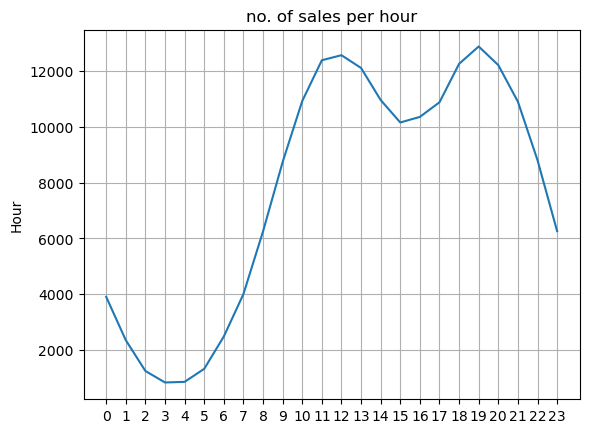

In [43]:
hour= [h for h, i in df.groupby('Hour')]
hour_count = df.groupby(['Hour'])['Hour'].count()
sns.lineplot(x=hour , y= hour_count )
plt.grid()
plt.xticks(hour)
plt.title('no. of sales per hour')
plt.show()

#### after wathcing the abow graph we can clearly see that around at 7:00 PM max sales happen 
#### and at 2nd number its 12 PM.
#### So, we can target these time slots for advertisement.

### what products are often sold together ?

In [46]:
df['Product'].value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [54]:
temp_df = df[df['Order ID'].duplicated(keep = False)]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,20
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,20
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,9
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,9
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,10
...,...,...,...,...,...,...,...,...,...,...
186709,295526,27in FHD Monitor,1,149.99,2019-11-21 11:26:00,"550 Park St, Dallas, TX 75001",11,149.99,Dallas TX,11
186717,295534,Google Phone,1,600.00,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,600.00,Boston MA,19
186718,295534,USB-C Charging Cable,1,11.95,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,11.95,Boston MA,19
186783,295599,iPhone,1,700.00,2019-11-25 21:17:00,"258 Ridge St, New York City, NY 10001",11,700.00,New York City NY,21


In [56]:
temp_df['Grouped Products'] = temp_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
temp_df.head()

/tmp/ipykernel_3623/2473532120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Grouped Products'] = temp_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,City,Hour,Grouped Products
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,7.68,San Francisco CA,20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",8,11.95,San Francisco CA,20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,700.00,San Francisco CA,9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",8,150.00,San Francisco CA,9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",8,600.00,New York City NY,10,"Google Phone,Wired Headphones"


In [57]:
temp_df = temp_df[['Order ID', 'Grouped Products']].drop_duplicates()
temp_df.head()

,Order ID,Grouped Products
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [58]:
from itertools import combinations
from collections import Counter

In [59]:
count = Counter()

for val in temp_df['Grouped Products']:
    val_list = val.split(',')
    count.update(Counter(combinations(val_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### Which Product sold the most

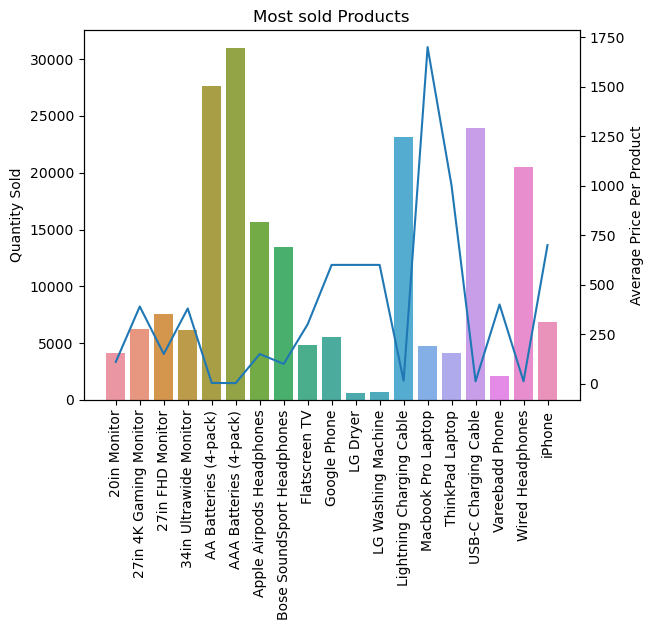

In [83]:
g_prod = df.groupby('Product')['Quantity Ordered'].sum()
m_price = df.groupby('Product')['Price Each'].mean()

prod = [prod for prod, i in df.groupby('Product')]

ax1 = sns.barplot(x=prod, y=g_prod)

ax2 = ax1.twinx()
sns.lineplot(x=prod, y=m_price , ax=ax2)

ax1.set_ylabel('Quantity Sold')
ax2.set_ylabel('Average Price Per Product')
ax1.set_xticklabels(ax.get_xticklabels(), rotation = 'vertical')
plt.title('Most sold Products')
plt.show()

#### expensive Products tend to sell less and less expensive products are sold out more
#### AAA batteries and AA batteries are most sold products respectively 
####  LG Dryer and LG Washing Machine are least sold products respectively 